# Mallet

Another algorithm for topic modeling is implemented in the java-based software Mallet. For this to work **you need to download and install Mallet** from http://mallet.cs.umass.edu/download.php.
Mallet uses plain text as input, so none of the preprocessing steps of this package are available for Mallet topic modeling as of yet.

#### Loading modules from DARIAH-Topics library
First, we have to get access to the functionalities of the library by importing them. For using its functions we use the prefix of the toolbox's submodules (pre, visual and mallet).

In [1]:
from dariah_topics import preprocessing as pre
from dariah_topics import visualization as visual
from dariah_topics import mallet as mal

#### Activating inline output in Jupyter notebook
The following line will just tell the notebook to show graphics in the output frames.

In [2]:
%matplotlib inline

### Preprocessing

#### Liste mit Dateinamen erzeugen

In [3]:
path_txt = "corpus_txt"

doclist_txt = pre.create_document_list(path_txt)
assert doclist_txt, "No documents found"
doclist_txt[:5]

INFO preprocessing: Creating document list from TXT files ...


['corpus_txt/Lovecraft_AttheMountainofMadness.txt',
 'corpus_txt/Howard_TheDevilinIron.txt',
 'corpus_txt/Poe_ThePurloinedLetter.txt',
 'corpus_txt/Lovecraft_TheShunnedHouse.txt',
 'corpus_txt/Poe_TheMasqueoftheRedDeath.txt']

#####  Liste mit Dokumentenlabels erzeugen

In [4]:
doc_labels = list(pre.get_labels(doclist_txt))
doc_labels[:5]

INFO preprocessing: Creating document labels ...


['Lovecraft_AttheMountainofMadness',
 'Howard_TheDevilinIron',
 'Poe_ThePurloinedLetter',
 'Lovecraft_TheShunnedHouse',
 'Poe_TheMasqueoftheRedDeath']

#### Corpus laden

In [5]:
corpus_txt = pre.read_from_txt(doclist_txt)

##### Tokenisieren

In [6]:
doc_tokens = [list(pre.tokenize(txt)) for txt in list(corpus_txt)]
len(doc_tokens)

INFO preprocessing: Accessing TXT documents ...


17

#### Create Dictionaries

In [7]:
id_types = pre.create_dictionary(doc_tokens)
doc_ids = pre.create_dictionary(doc_labels)

#### Create Sparse Bow (for large corpora)

In [8]:
sparse_bow = pre.create_sparse_bow(doc_labels, doc_tokens, id_types, doc_ids)

In [9]:
##### Remove features

In [10]:
import os.path
basepath = os.path.abspath('.')

with open(os.path.join(basepath, "tutorial_supplementals", "stopwords", "en.txt"), 'r', encoding = 'utf-8') as f: 
    stopword_list = f.read().split('\n')
    
stopword_list = set(stopword_list)

In [11]:
hapax_from_remove = pre.find_hapax(sparse_bow, id_types)
stopwords_from_remove = pre.find_stopwords(sparse_bow, id_types, mfw=75)

features_to_be_removed = stopwords_from_remove + hapax_from_remove

sparse_bow_short = pre.remove_features(sparse_bow, id_types, features_to_be_removed)
len(stopwords_from_remove)

INFO preprocessing: Finding hapax legomena ...
INFO preprocessing: Finding stopwords ...
INFO preprocessing: Removing features ...


75

In [12]:
doc2bow_list = []
for doc in sparse_bow.index.groupby(sparse_bow.index.get_level_values('doc_id')):
    temp = [(token, count) for token, count in zip(sparse_bow.loc[doc].index, sparse_bow.loc[doc][0])]
    doc2bow_list.append(temp)
len(doc2bow_list)

17

In [13]:
#len(features_to_be_removed)
#len(doc_tokens[0])

#### Remove features from files

In [14]:
doc_tokens_cleaned = []

for doc_token_list in doc_tokens:
    doc_token_list_cleaned = pre.remove_features_from_file(doc_token_list, features_to_be_removed)
    doc_tokens_cleaned.append(list(doc_token_list_cleaned))

In [15]:
doc_tokens_cleaned[0]

[['mountains',
  'madness',
  'lovecraft',
  'chapter',
  'am',
  'forced',
  'speech',
  'because',
  'men',
  'science',
  'refused',
  'follow',
  'advice',
  'without',
  'knowing',
  'why',
  'altogether',
  'against',
  'tell',
  'reasons',
  'contemplated',
  'invasion',
  'antarctic',
  'its',
  'vast',
  'fossil',
  'hunt',
  'its',
  'wholesale',
  'boring',
  'melting',
  'ancient',
  'ice',
  'caps',
  'am',
  'reluctant',
  'because',
  'warning',
  'may',
  'vain',
  'doubt',
  'real',
  'facts',
  'must',
  'reveal',
  'inevitable',
  'yet',
  'suppressed',
  'seem',
  'extravagant',
  'incredible',
  'nothing',
  'left',
  'hitherto',
  'withheld',
  'photographs',
  'both',
  'ordinary',
  'aerial',
  'count',
  'favor',
  'damnably',
  'vivid',
  'graphic',
  'still',
  'doubted',
  'because',
  'great',
  'lengths',
  'clever',
  'can',
  'carried',
  'ink',
  'drawings',
  'course',
  'jeered',
  'obvious',
  'notwithstanding',
  'strangeness',
  'technique',
  'art

#### Write mallet import files

In [17]:
pre.create_mallet_import(doc_tokens_cleaned, doc_labels)

## 1. Setting the parameters

#### Define path to corpus folder

In [18]:
path_to_corpus = "tutorial_supplementals/mallet_input/"

#### Path to mallet folder 

Now we must tell the library where to find the local instance of mallet. If you managed to install Mallet, it is sufficient set `path_to_mallet = "mallet"`, if you just store Mallet in a local folder, you have to specify the path to the binary explictly.

In [19]:
path_to_mallet = "/home/sina/mallet-2.0.8/bin/mallet"
#path_to_mallet = "/home/severin/Documents/dariah/app/mallet/bin/mallet"

#### Output folder

In [20]:
outfolder = "tutorial_supplementals/mallet_output"
binary = "tutorial_supplementals/mallet_output/binary.mallet"

#### The Mallet corpus model

Finally, we can give all these folder paths to a Mallet function that handles all the preprocessing steps and creates a Mallet-specific corpus model object.

In [31]:
mallet_model = mal.create_mallet_binary(path_to_mallet=path_to_mallet, path_to_corpus=path_to_corpus, output_file=binary)

INFO mallet: Running MALLET with ['/home/sina/mallet-2.0.8/bin/mallet', 'import-dir', '--input', 'tutorial_supplementals/mallet_input/', '--remove-stopwords', '--keep-sequence', '--output', 'tutorial_supplementals/mallet_output/binary.mallet'] ...
INFO mallet: Saving MALLET binary to tutorial_supplementals/mallet_output/binary.mallet ...


## 2. Model creation

**Warning: this step can take quite a while!** Meaning something between some seconds and some hours depending on corpus size and the number of passes.

In [32]:
num_topics = 10
output_folder = mal.create_mallet_model(path_to_mallet = path_to_mallet, 
                                        path_to_binary = mallet_model, 
                                        folder_for_output = outfolder,
                                        num_top_words = 10,
                                        num_iterations = 500,
                                        num_topics = num_topics
                                        )

INFO mallet: Accessing Mallet with ['/home/sina/mallet-2.0.8/bin/mallet', 'train-topics', '--input', 'tutorial_supplementals/mallet_output/binary.mallet', '--num-topics', '10', '--num-iterations', '500', '--num-threads', '1', '--num-top-words', '10', '--num-icm-iterations', '0', '--random-seed', '0', '--optimize-interval', '0', '--optimize-burn-in', '200', '--use-symmetric-alpha', '--alpha', '5.0', '--beta', '0.01', '--output-topic-keys', '/home/sina/DARIAH/Topics/tutorial_supplementals/mallet_output/wordles/topic_keys.txt', '--output-doc-topics', '/home/sina/DARIAH/Topics/tutorial_supplementals/mallet_output/wordles/doc_topics.txt', '--doc-topics-threshold', '0.0', '--topic-word-weights-file', '/home/sina/DARIAH/Topics/tutorial_supplementals/mallet_output/wordles/topic_word_weights.txt', '--word-topic-counts-file', '/home/sina/DARIAH/Topics/tutorial_supplementals/mallet_output/wordles/word_topic_counts.txt', '--diagnostics-file', '/home/sina/DARIAH/Topics/tutorial_supplementals/mallet

### 2.4. Create document-topic matrix

The generated model object can now be translated into a human-readable document-topic matrix (that is a actually a pandas data frame) that constitutes our principle exchange format for topic modeling results. For generating the matrix from a Gensim model, we can use the following function:

In [34]:
doc_topic = mal.show_doc_topic_matrix("tutorial_supplementals/mallet_output")
doc_topic

,Lovecraft_AttheMountainofMadness.txt,Howard_TheDevilinIron.txt,Poe_ThePurloinedLetter.txt,Lovecraft_TheShunnedHouse.txt,Poe_TheMasqueoftheRedDeath.txt,Doyle_TheSignoftheFour.txt,Doyle_AStudyinScarlet.txt,Howard_ShadowsintheMoonlight.txt,Kipling_TheEndofthePassage.txt,Poe_EurekaAProsePoem.txt,Howard_GodsoftheNorth.txt,Doyle_TheHoundoftheBaskervilles.txt,Kipling_ThyServantaDog.txt,Poe_TheCaskofAmontillado.txt,Doyle_AScandalinBohemia.txt,examplefile.txt,Howard_SchadowsinZamboula.txt,Kipling_TheJungleBook.txt
back left feet,0.164620,0.226697,0.086048,0.184081,0.203380,0.146569,0.131997,0.269827,0.146310,0.026206,0.264413,0.152033,0.113097,0.434591,0.118340,0.214286,0.225020,0.166649
time night good,0.040317,0.084070,0.098812,0.089645,0.087995,0.275443,0.244567,0.113958,0.559594,0.017359,0.086477,0.211437,0.200910,0.135220,0.245560,0.071429,0.109620,0.273925
centre atoms idea,0.038715,0.014363,0.102773,0.037751,0.026224,0.013010,0.014200,0.003043,0.014576,0.695450,0.005338,0.009109,0.004363,0.042138,0.011055,0.071429,0.008523,0.001552
sir holmes moor,0.008752,0.003315,0.060519,0.033310,0.023893,0.111467,0.067082,0.006380,0.027122,0.007025,0.006762,0.376233,0.015339,0.039623,0.225625,0.071429,0.000882,0.000921
found holmes street,0.019550,0.022399,0.082086,0.115591,0.074009,0.292237,0.354869,0.021692,0.063653,0.005985,0.008185,0.090802,0.026128,0.069811,0.244110,0.071429,0.031250,0.010286
great lake land,0.562685,0.054942,0.016945,0.315217,0.030886,0.013298,0.018945,0.034256,0.024170,0.012750,0.036655,0.012711,0.006426,0.042138,0.005256,0.071429,0.021062,0.004656
case thought point,0.141124,0.049920,0.545114,0.166784,0.263986,0.104548,0.128146,0.026796,0.078782,0.230206,0.027402,0.113040,0.041608,0.214465,0.117253,0.214286,0.035952,0.010233
conan door eyes,0.020678,0.520992,0.001981,0.045465,0.281469,0.028723,0.027816,0.499313,0.035978,0.004646,0.543416,0.029937,0.011680,0.011950,0.029902,0.071429,0.549667,0.020913
ravager smallest dog,0.001335,0.004319,0.005502,0.008065,0.007576,0.006523,0.004710,0.003435,0.011993,0.000037,0.000356,0.003419,0.558261,0.005660,0.002356,0.071429,0.001665,0.004025
mowgli jungle bagheera,0.002225,0.018984,0.000220,0.004091,0.000583,0.008181,0.007667,0.021300,0.037823,0.000335,0.020996,0.001279,0.022188,0.004403,0.000544,0.071429,0.016360,0.506840


## 3. Visualization

Now we can see the topics in the model with the following function:

**Hint:** Depending on the number of topics chosen in step 2, you might have to adjust *num_topics* in this step accordingly.

In [24]:
num_topics = 10
mal.show_topics_keys("tutorial_supplementals/mallet_output", num_topics = num_topics)

,Key 1,Key 2,Key 3,Key 4,Key 5,Key 6,Key 7,Key 8,Key 9,Key 10
Topic 1,back,left,feet,dark,lay,turned,open,make,white,house
Topic 2,time,night,good,made,long,eyes,day,don't,side,hand
Topic 3,centre,atoms,idea,space,force,sun,general,universe,principle,fact
Topic 4,sir,holmes,moor,watson,henry,baskerville,friend,case,mortimer,stapleton
Topic 5,found,holmes,street,house,asked,door,answered,room,small,sherlock
Topic 6,great,lake,land,camp,things,world,place,city,mountains,danforth
Topic 7,case,thought,point,great,light,thing,earth,reason,matter,made
Topic 8,conan,door,eyes,black,trees,sword,girl,men,great,wall
Topic 9,ravager,smallest,dog,moore,slippers,proper,master,tags,wented,told
Topic 10,mowgli,jungle,bagheera,big,head,thou,wolf,rikki-tikki,sea,nag


### 3.1. Distribution of topics

#### Distribution of topics over all documents

The distribution of topics over all documents can now be visualized in a heat map:

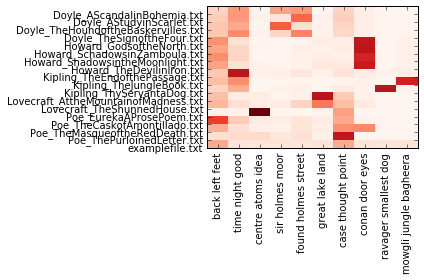

In [25]:
heatmap = visual.doc_topic_heatmap(doc_topic)
heatmap.show()

#### Distribution of topics in a single documents

To take closer look on the topics in a single text, we can use the follwing function that shows all the topics in a text and their respective proportions. To select the document, we have to give its index to the function.

<module 'matplotlib.pyplot' from '/home/sina/.local/lib/python3.5/site-packages/matplotlib/pyplot.py'>

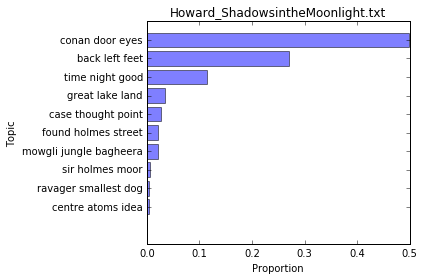

In [26]:
#document_nr = 7
visual.plot_doc_topics(doc_topic, 7)

In [27]:
word_weights_file = "tutorial_supplementals/mallet_output/topic_word_weights.txt"

word_scores_grouped = visual.read_mallet_word_weights(word_weights_file)

topic_nr  = 0
word_scores_grouped.get_group(topic_nr)

/home/sina/DARIAH/Topics/dariah_topics/visualization.py:352: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  word_scores = word_scores.sort(columns=[0,2], axis=0, ascending=[True, False])


,0,1,2
1362,0,back,293.01
37,0,left,194.01
176,0,feet,186.01
1180,0,dark,181.01
1202,0,lay,172.01
2003,0,turned,155.01
451,0,open,141.01
1266,0,make,139.01
500,0,white,138.01
3699,0,house,135.01


In [28]:
number_of_top_words = 10
topic_nr = 2

wordlewords = visual.get_wordlewords(word_scores_grouped, number_of_top_words, topic_nr)

['centre', 'atoms', 'idea', 'space', 'sun', 'force', 'general', 'universe', 'fact', 'principle']
[101.01, 95.01, 88.01, 87.01, 81.01, 81.01, 78.01, 76.01, 70.01, 70.01]


In [29]:
wordlewords

'centre 101.01atoms 95.01idea 88.01space 87.01sun 81.01force 81.01general 78.01universe 76.01fact 70.01principle 70.01'

/home/sina/DARIAH/Topics/dariah_topics/visualization.py:352: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  word_scores = word_scores.sort(columns=[0,2], axis=0, ascending=[True, False])


['found', 'holmes', 'street', 'house', 'asked', 'room', 'answered', 'door', 'small', 'sherlock']
[183.01, 174.01, 158.01, 134.01, 130.01, 128.01, 128.01, 128.01, 121.01, 109.01]
found 183.01holmes 174.01street 158.01house 134.01asked 130.01room 128.01answered 128.01door 128.01small 121.01sherlock 109.01


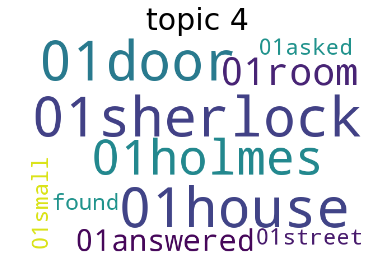

In [30]:
word_weights_file = "/home/sina/DARIAH/Topics/tutorial_supplementals/mallet_output/topic_word_weights.txt"
numOfTopics = 4
outfolder = "/home/sina/DARIAH/Topics/tutorial_supplementals/mallet_output/wordles"
dpi = 200
font_path = "/home/sina/DARIAH/Topics/tutorial_supplementals/font"
number_of_top_words = 10

wordle = visual.plot_wordle_from_mallet(word_weights_file, 
                                 numOfTopics,
                                 number_of_top_words,
                                 outfolder,
                                 dpi)